## Decision Tree Classification: Iris
<img src="local_data/IrisPhoto.png"></src>


In [1]:
%pip install graphviz ipython matplotlib numpy pandas pydotplus scikit-learn

Note: you may need to restart the kernel to use updated packages.


Before running, install the following packages: 
- GraphViz software https://graphviz.org/_pages/Download/Download_windows.html
- Add GraphViz to windows path:
    - In "System Properties", pick "Advanced" tab. 
    - Environment Variables->System Variables-> Path -> Edit -> New
    - Add: c:\Program Files (x86)\Graphviz2.38\bin\
- In Anaconda prompt, install:
    - pip install graphviz
    - pip install pydotplus
- Restart Jupiter.  

### Load data

In [2]:
import pandas as pd
from sklearn.datasets import load_iris
iris_data = load_iris()
# transform to pandas
iris = pd.DataFrame(iris_data['data'],columns=iris_data['feature_names'])
iris['class'] = iris_data['target_names'][iris_data['target']]
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
X=iris[iris_data.feature_names]
y=iris['class']

In [4]:
y.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## Train decision tree

In [5]:
from sklearn import tree
import numpy as np
from sklearn.model_selection import cross_val_score
clf_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf_tree.fit(X,y)
obs_1 = np.array((9.9,3.4,1.4,2.2)).reshape(1,-1)
#clf.predict((np.array(5.1,3.5,1.4,0.2)))

In [6]:
clf_tree.predict(obs_1)

c:\Users\zvibe\anaconda3\envs\AI_dev\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['virginica'], dtype=object)

## Generate Graphical Representation of the Tree 

In [7]:
#!pip install GraphViz
#!pip install pydotplus
#!pip install graphviz

In [8]:
#!pip install pydotplus

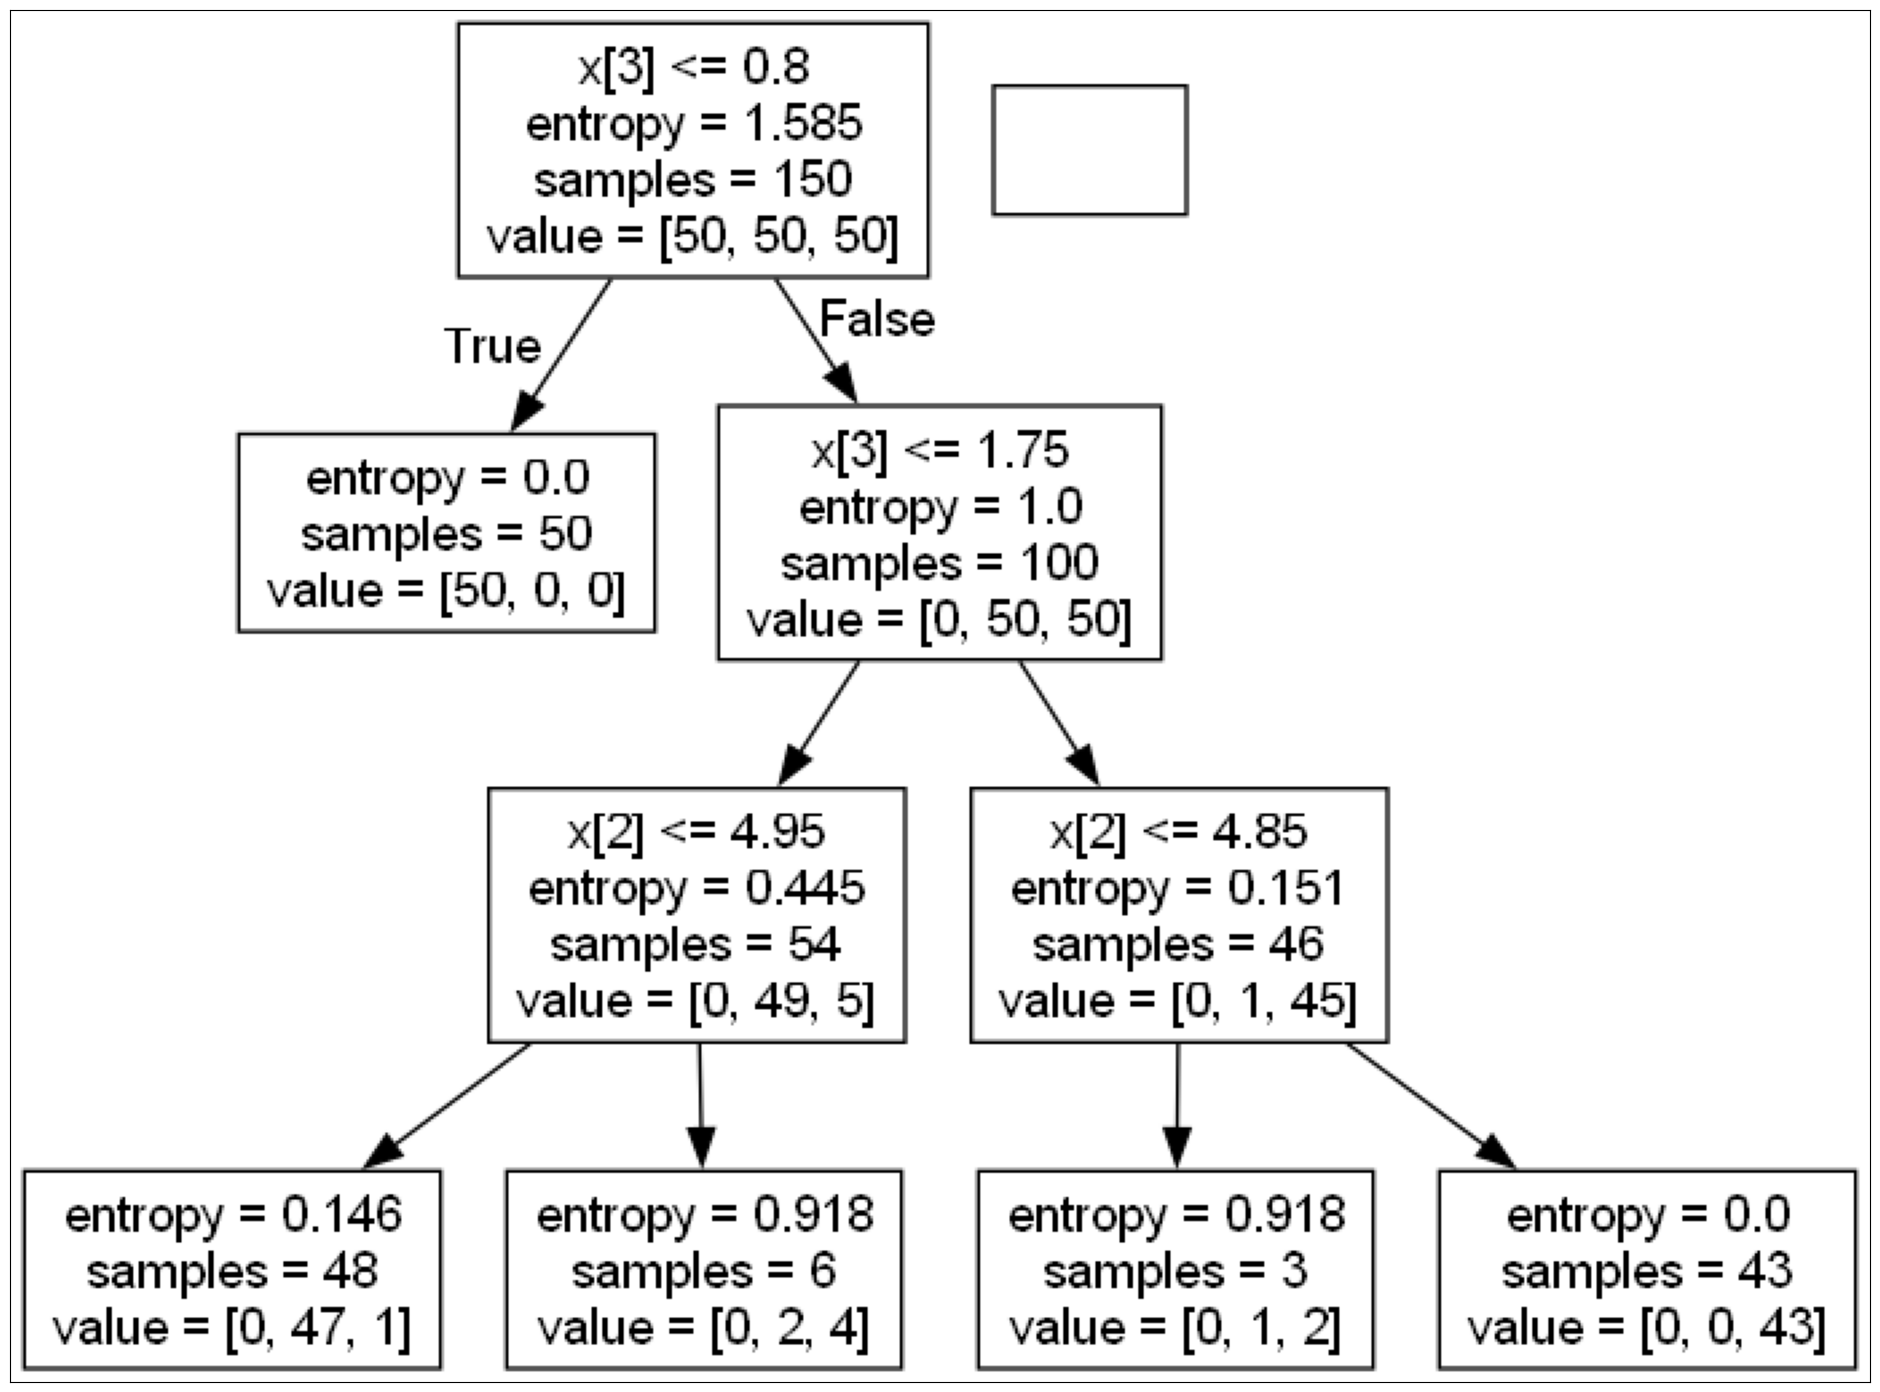

In [9]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from IPython.display import Image
import pydotplus # generates graphs. >>pip install pydotplus + install GraphViz + conda install graphviz
# install graphviz  from: https://graphviz.gitlab.io/_pages/Download/windows/graphviz-2.38.msi 
# Add c:\Program Files (x86)\Graphviz2.38\bin\ to system path

dot_data = tree.export_graphviz(clf_tree, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_png('iris.png');
fig, ax = plt.subplots(figsize=(24, 24))
ax.imshow(plt.imread('iris.png'));
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

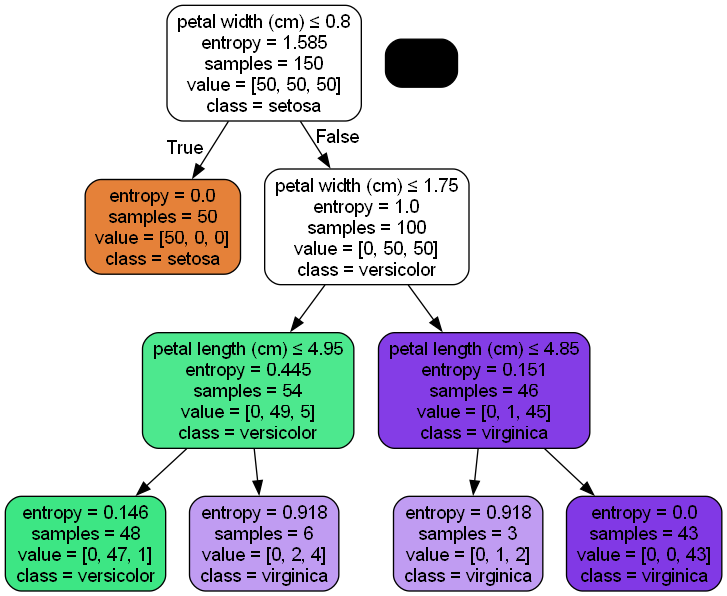

In [10]:
dot_data = tree.export_graphviz(clf_tree, out_file=None, 
                         feature_names=iris_data.feature_names,  
                         class_names=iris_data.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  